In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("rocket_orientation_data.csv")

In [88]:
data.head()

,Timestamp,Qc0,Qc1,Qc2,Qc3
0,0.0,0.614576,0.667145,0.170306,0.384982
1,20.0,0.601244,0.732270,0.042349,0.317006
2,40.0,0.765094,0.277813,0.159249,0.558651
3,60.0,0.725521,0.569305,0.358839,0.144032
4,80.0,0.623711,0.758080,0.179746,0.063162


In [89]:
data.describe()

,Timestamp,Qc0,Qc1,Qc2,Qc3
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4990.000000,0.456400,0.438093,0.436907,0.440771
std,2889.636655,0.235432,0.233262,0.231111,0.227564
min,0.000000,0.002861,0.000338,0.006662,0.002421
25%,2495.000000,0.269188,0.258655,0.242899,0.259946
50%,4990.000000,0.471642,0.445202,0.458148,0.454189
75%,7485.000000,0.643706,0.618342,0.613541,0.615986
max,9980.000000,0.994598,0.971782,0.954642,0.955876


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  500 non-null    float64
 1   Qc0        500 non-null    float64
 2   Qc1        500 non-null    float64
 3   Qc2        500 non-null    float64
 4   Qc3        500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


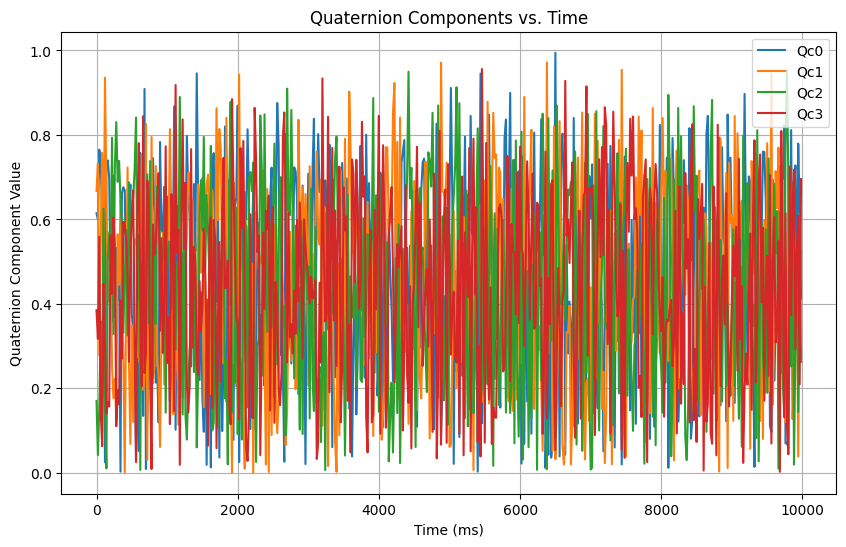

Standard Deviations:
Qc0: 0.2354317649706283
Qc1: 0.2332622842346344
Qc2: 0.231110519918872
Qc3: 0.22756391753996236


In [91]:
std_devs = data[['Qc0', 'Qc1', 'Qc2', 'Qc3']].std()

# Plot the quaternion values with respect to time
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Qc0'], label='Qc0')
plt.plot(data['Timestamp'], data['Qc1'], label='Qc1')
plt.plot(data['Timestamp'], data['Qc2'], label='Qc2')
plt.plot(data['Timestamp'], data['Qc3'], label='Qc3')
plt.xlabel('Time (ms)')
plt.ylabel('Quaternion Component Value')
plt.title('Quaternion Components vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Display standard deviations
print("Standard Deviations:")
print("Qc0:", std_devs['Qc0'])
print("Qc1:", std_devs['Qc1'])
print("Qc2:", std_devs['Qc2'])
print("Qc3:", std_devs['Qc3'])

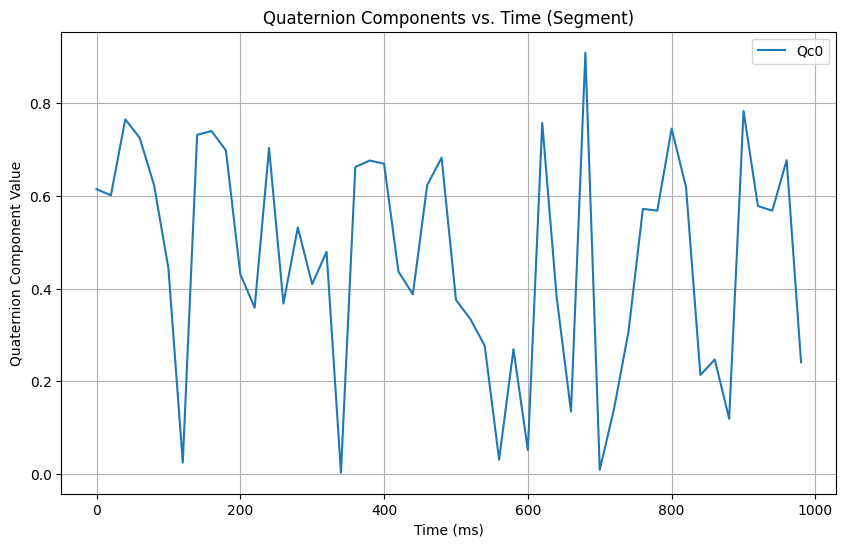

In [92]:
segment_data = data[:50]

# Plot the quaternion values of the segment with respect to time
plt.figure(figsize=(10, 6))
plt.plot(segment_data['Timestamp'], segment_data['Qc0'], label='Qc0')
plt.xlabel('Time (ms)')
plt.ylabel('Quaternion Component Value')
plt.title('Quaternion Components vs. Time (Segment)')
plt.legend()
plt.grid(True)
plt.show()

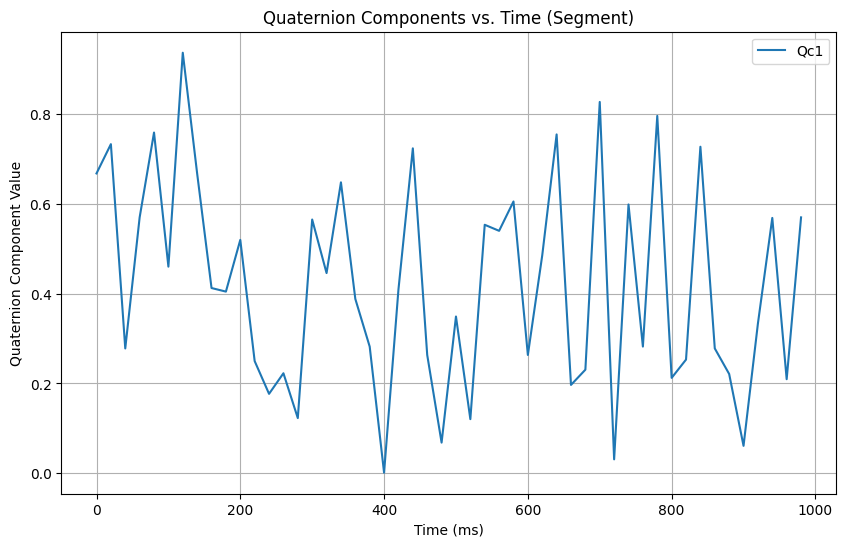

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(segment_data['Timestamp'], segment_data['Qc1'], label='Qc1')
plt.xlabel('Time (ms)')
plt.ylabel('Quaternion Component Value')
plt.title('Quaternion Components vs. Time (Segment)')
plt.legend()
plt.grid(True)
plt.show()

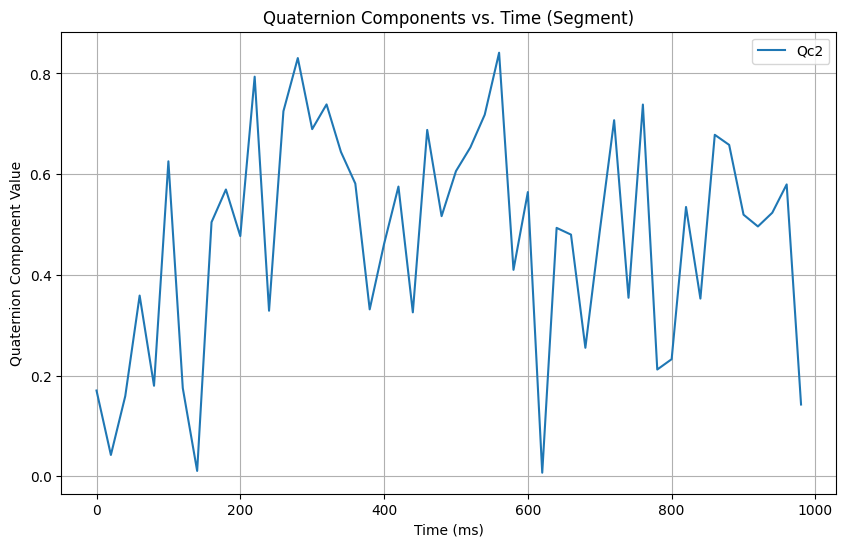

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(segment_data['Timestamp'], segment_data['Qc2'], label='Qc2')
plt.xlabel('Time (ms)')
plt.ylabel('Quaternion Component Value')
plt.title('Quaternion Components vs. Time (Segment)')
plt.legend()
plt.grid(True)
plt.show()

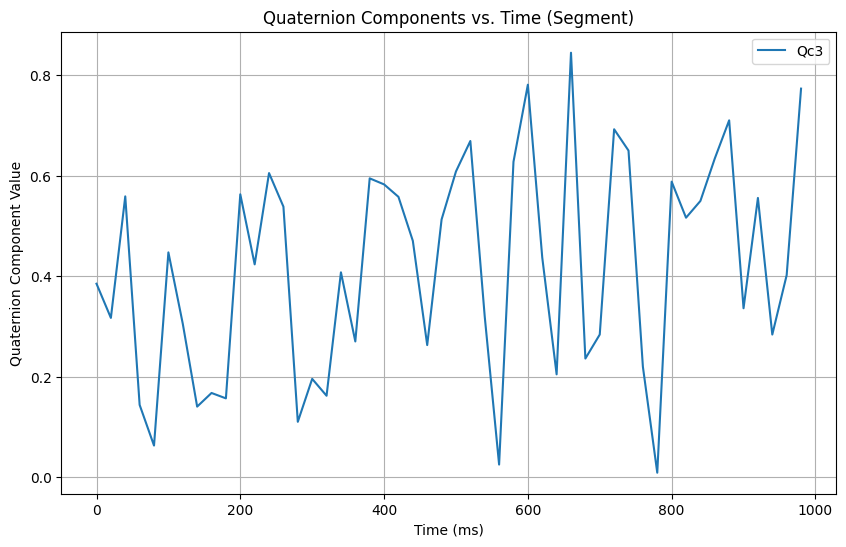

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(segment_data['Timestamp'], segment_data['Qc3'], label='Qc3')
plt.xlabel('Time (ms)')
plt.ylabel('Quaternion Component Value')
plt.title('Quaternion Components vs. Time (Segment)')
plt.legend()
plt.grid(True)
plt.show()

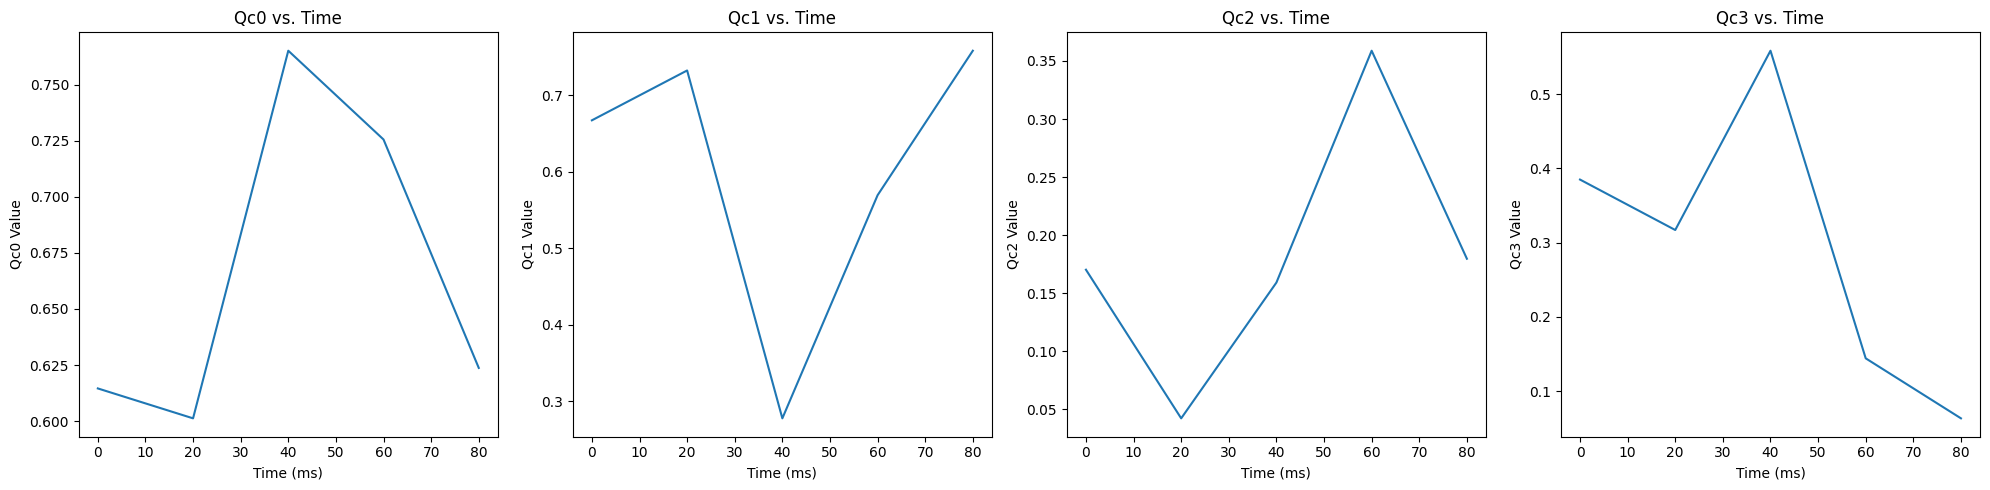

In [96]:
segment_data = data[:5]

# Create subplots for each quaternion component
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot each quaternion component of the segment with respect to time
for i, qc in enumerate(['Qc0', 'Qc1', 'Qc2', 'Qc3']):
    axs[i].plot(segment_data['Timestamp'], segment_data[qc])
    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel(f'{qc} Value')
    axs[i].set_title(f'{qc} vs. Time')

plt.tight_layout()
plt.show()

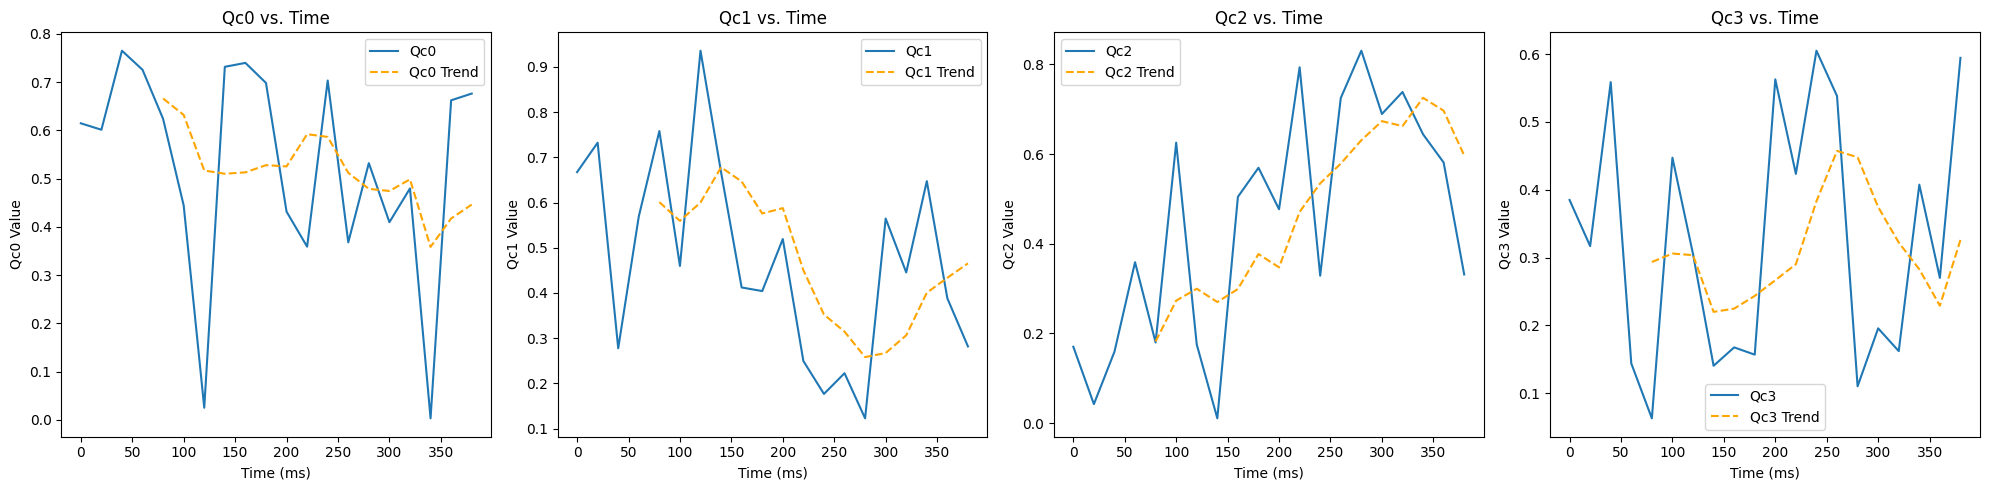

In [97]:
# Select a small segment of the data (e.g., first 20 rows)
segment_data = data[:20]

# Create subplots for each quaternion component
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot trends for each quaternion component of the segment with respect to time
for i, qc in enumerate(['Qc0', 'Qc1', 'Qc2', 'Qc3']):
    axs[i].plot(segment_data['Timestamp'], segment_data[qc], label=f'{qc}')
    rolling_mean = segment_data[qc].rolling(window=5).mean()  # Calculate rolling average with window size 5
    axs[i].plot(segment_data['Timestamp'], rolling_mean, label=f'{qc} Trend', linestyle='dashed', color='orange')
    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel(f'{qc} Value')
    axs[i].set_title(f'{qc} vs. Time')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Designing The Algorithm

In [98]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

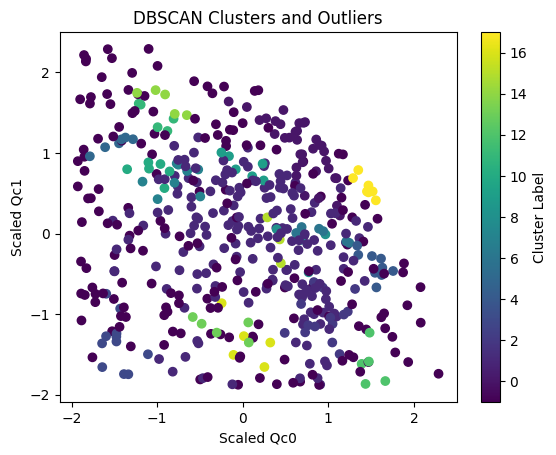

In [99]:
data = pd.read_csv('rocket_orientation_data.csv')  

# Select quaternion features
X = data[['Qc0', 'Qc1', 'Qc2', 'Qc3']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  
labels = dbscan.fit_predict(X_scaled)

# Plot the clusters and outliers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Scaled Qc0')
plt.ylabel('Scaled Qc1')
plt.title('DBSCAN Clusters and Outliers')
plt.colorbar(label='Cluster Label')
plt.show()
